# Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

## Load the Dataset

In [2]:
df = pd.read_csv('D:/shivani/DATA/Breast_Cancer.csv')

## Prepare the Data

In [4]:
X = df.drop(['Progesterone Status'], axis=1)
y = df['Progesterone Status']

## Encode Categorical Variables

In [5]:
X = pd.get_dummies(X, drop_first=True)

## Split the Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Build the Logistic Regression Model

In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the Model

Accuracy: 0.8807453416149068
              precision    recall  f1-score   support

    Negative       0.89      0.36      0.51       140
    Positive       0.88      0.99      0.93       665

    accuracy                           0.88       805
   macro avg       0.89      0.67      0.72       805
weighted avg       0.88      0.88      0.86       805



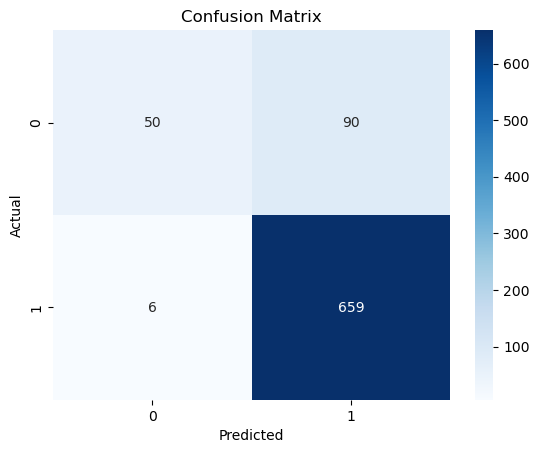

In [8]:
y_pred = model.predict(X_test)

# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Coefficients Analysis

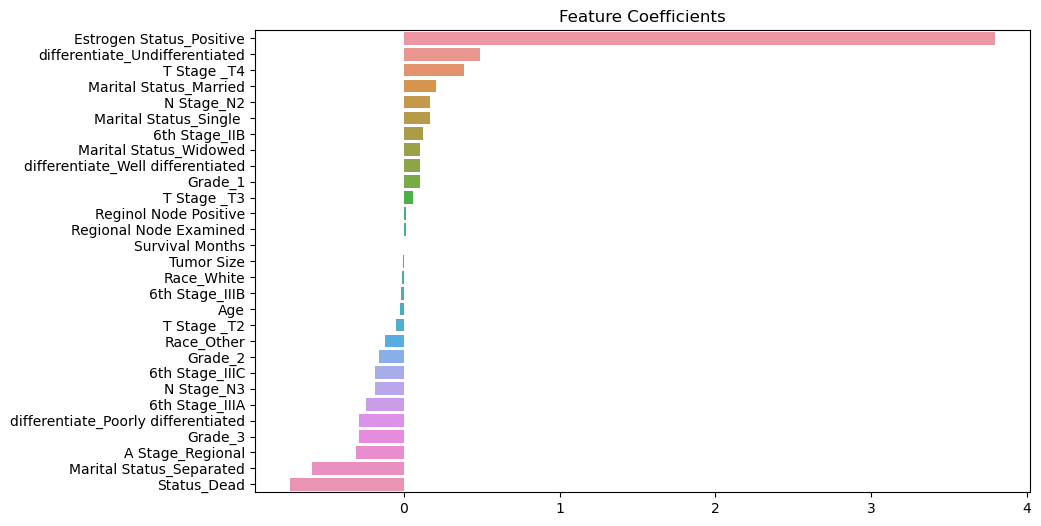

In [9]:
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=coefficients.index)
plt.title('Feature Coefficients')
plt.show()

## Save the Model and Results

In [10]:
import joblib
joblib.dump(model, 'D:/shivani/DATA/logistic_regression_model.pkl')

['D:/shivani/DATA/logistic_regression_model.pkl']